In [159]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
# make consistent column names across files
country_title = ['Country', 'Country or region', "Country name"]
economy_title = ["Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita", "Explained by: Log GDP per capita"]
trust_title = ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"]
health_title = ["Health (Life Expectancy)", "Health..Life.Expectancy.", "Explained by: Log GDP per capita", "Healthy life expectancy"]
generosity_title = ["Generosity"]
family_title = ["Family", "Social support"]
score_title = ["Happiness Score", "Happiness.Score", "Score", "Ladder score"]

# process each year
data_all_years_list = []
for year in range(2015, 2022):
    file = pd.read_csv(f'data/{year}.csv')
    if year == 2021 or year == 2020:
        if file.columns[8] == health_title[3]:
            file = file.drop(file.columns[8], axis=1)
    df = file.loc[:, file.columns.isin(list(country_title))].copy()
    df = df.rename(columns={'Country or region': 'Country', "Country name": 'Country'})
    df["Economy"] = file.loc[:, file.columns.isin(list(economy_title))].copy()
    df["Trust"] = file.loc[:, file.columns.isin(list(trust_title))].copy()
    df["Health"] = file.loc[:, file.columns.isin(list(health_title))].copy()
    df["Generosity"] = file.loc[:, file.columns.isin(list(generosity_title))].copy()
    df["Family"] = file.loc[:, file.columns.isin(list(family_title))].copy()
    df["Score"] = file.loc[:, file.columns.isin(list(score_title))].copy()
    df["Year"] = year
    data_all_years_list.append(df)
    # display(file)

# concatenate each year and create single dataframe
df = pd.concat(data_all_years_list, ignore_index=True)
# df = df.replace(to_replace=np.nan, value = -99)

features = df[["Country", "Economy", "Trust", "Health", "Generosity", "Family"]]
target = df["Score"]
display(df)

,Country,Economy,Trust,Health,Generosity,Family,Score,Year
0,Switzerland,1.39651,0.41978,0.94143,0.29678,1.34951,7.587,2015
1,Iceland,1.30232,0.14145,0.94784,0.43630,1.40223,7.561,2015
2,Denmark,1.32548,0.48357,0.87464,0.34139,1.36058,7.527,2015
3,Norway,1.45900,0.36503,0.88521,0.34699,1.33095,7.522,2015
4,Canada,1.32629,0.32957,0.90563,0.45811,1.32261,7.427,2015
...,...,...,...,...,...,...,...,...
1079,Lesotho,0.45100,0.91500,0.45100,-0.13100,0.78700,3.512,2021
1080,Botswana,1.09900,0.80100,1.09900,-0.24600,0.78400,3.467,2021
1081,Rwanda,0.36400,0.16700,0.36400,0.06100,0.55200,3.415,2021
1082,Zimbabwe,0.45700,0.82100,0.45700,-0.04700,0.75000,3.145,2021


In [161]:
%%capture

# Statistics

for feat in df.columns:
    if feat == "Country" or feat == "Year":
        continue
    print(feat, " Statistics:")
    print(df[feat].describe())
    min = df[feat].min()
    series_min = df.iloc[int(df[feat].argmin())]
    country_min = series_min["Country"]
    year_min = series_min["Year"]
    max = df[feat].max()
    series_max = df.iloc[int(df[feat].argmax())]
    country_max = series_max["Country"]
    year_max = series_max["Year"]

    print(feat + " Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
    print(feat + " Maximum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")\n")

with open('output.txt', 'w') as f:
    f.write(cap.stdout)

In [163]:
countries = df[df["Score"]>7.5]
print(countries["Country"].unique())

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Finland']


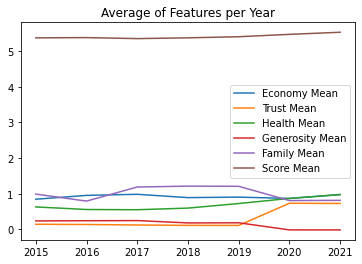

In [162]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
economy_avgs = []
trust_avgs = []
health_avgs = []
generosity_avgs = []
social_supp_avgs = []
score_avgs = []

for year in years:
    df_year = df[df["Year"] == year]
    economy_avgs.append(df_year["Economy"].mean())
    trust_avgs.append(df_year["Trust"].mean())
    health_avgs.append(df_year["Health"].mean())
    generosity_avgs.append(df_year["Generosity"].mean())
    social_supp_avgs.append(df_year["Family"].mean())
    score_avgs.append(df_year["Score"].mean())

plt.plot(years, economy_avgs, label = "Economy Mean")
plt.plot(years, trust_avgs, label = "Trust Mean")
plt.plot(years, health_avgs, label = "Health Mean")
plt.plot(years, generosity_avgs, label = "Generosity Mean")
plt.plot(years, social_supp_avgs, label = "Family Mean")
plt.plot(years, score_avgs, label = "Score Mean")
plt.legend()
plt.title("Average of Features per Year")
plt.show()

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
top_10 = []

for year in years:
    df_year = df[df["Year"] == year]
    top_10.append(df_year.nlargest(10, "Score"))

for i in range(len(top_10)):
    x = list(top_10[i]["Country"])
    y = top_10[i]["Score"]
    year = years[i]

    plt.figure(figsize=(10, 5))
    ax = y.plot(kind="bar")
    ax.set_title("Score of Top 10 Countries for " + str(year))
    ax.set_xlabel("Country")
    ax.set_ylabel("Score")
    ax.set_xticklabels(x)

    rects = ax.patches

    for rect, val in zip(rects, list(y)):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, "{:.3f}".format(val), ha="center", va="bottom"
        )

    plt.show()

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
bot_10 = []

for year in years:
    df_year = df[df["Year"] == year]
    bot_10.append(df_year.nsmallest(10, "Score"))

for i in range(len(bot_10)):
    x = list(bot_10[i]["Country"])
    y = bot_10[i]["Score"]
    year = years[i]

    plt.figure(figsize=(10, 5))
    ax = y.plot(kind="bar")
    ax.set_title("Score of Bottom 10 Countries for " + str(year))
    ax.set_xlabel("Country")
    ax.set_ylabel("Score")
    ax.set_xticklabels(x)

    rects = ax.patches

    for rect, val in zip(rects, list(y)):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, "{:.3f}".format(val), ha="center", va="bottom"
        )

    plt.show()

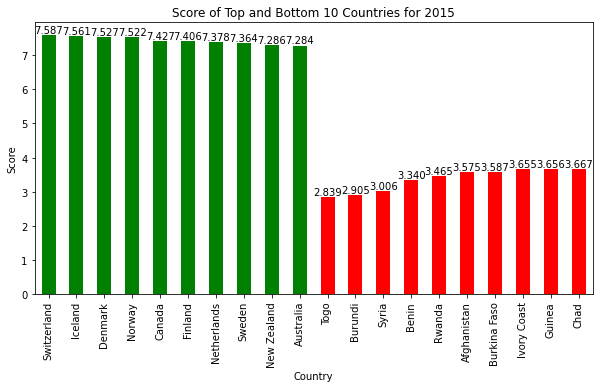

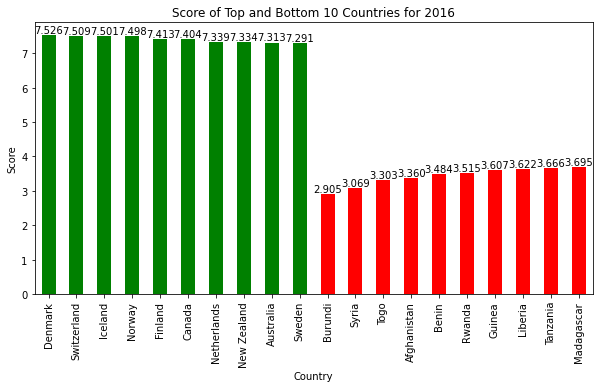

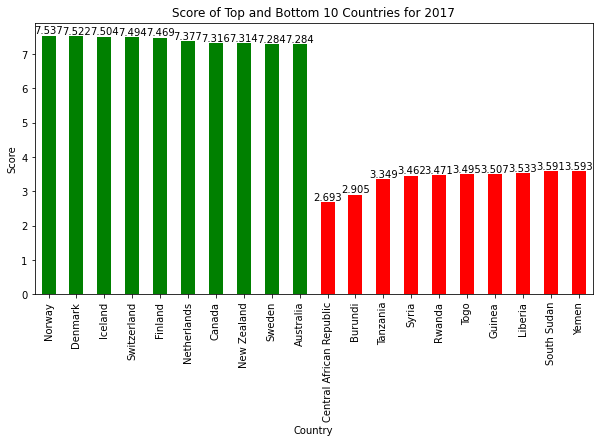

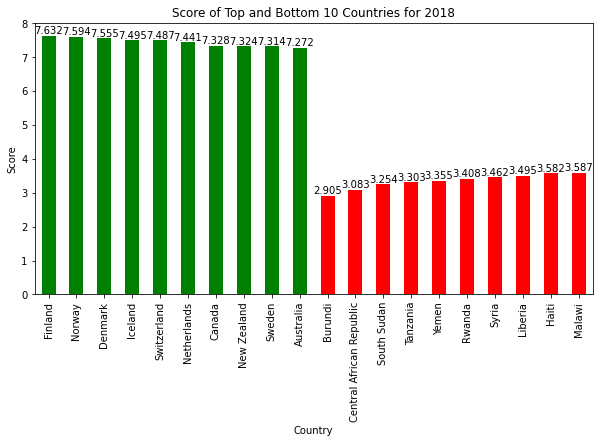

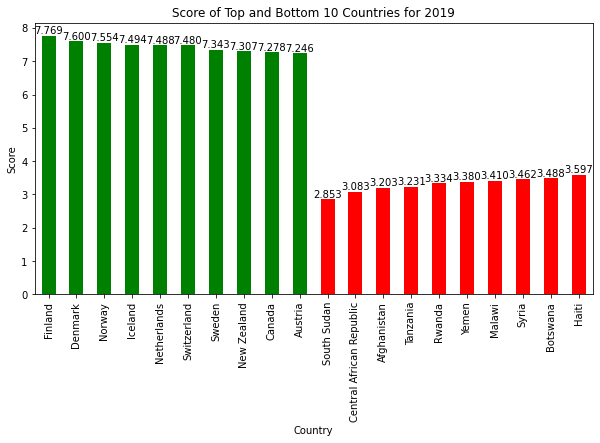

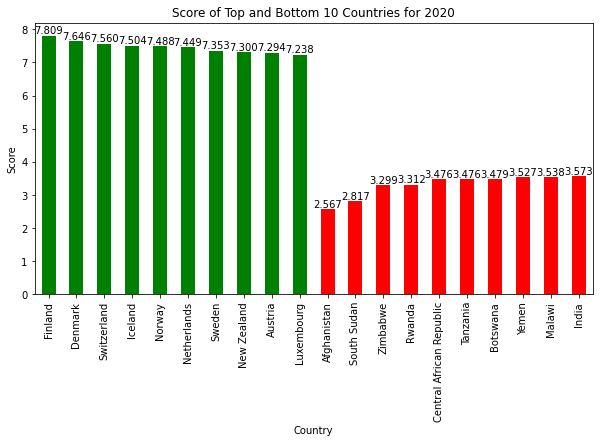

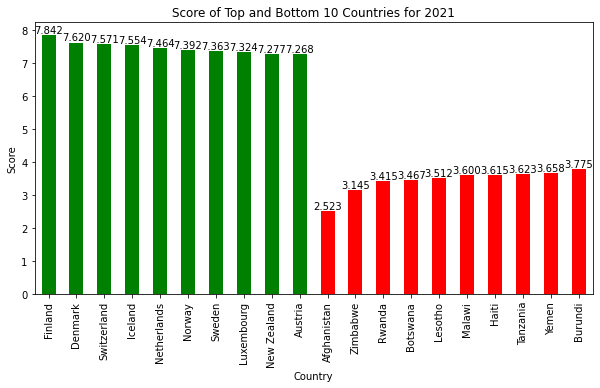

In [149]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
combined = []

for year in years:
    df_year = df[df["Year"] == year]
    top = df_year.nlargest(10, "Score")
    top["Color"] = "green"
    bot = df_year.nsmallest(10, "Score")
    bot["Color"] = "red"
    to_join = [top, bot]
    combined.append(pd.concat(to_join))

for i in range(len(combined)):
    x = list(combined[i]["Country"])
    y = combined[i]["Score"]
    year = years[i]

    plt.figure(figsize=(10, 5))
    ax = y.plot.bar(color = combined[i]["Color"])
    ax.set_title("Score of Top and Bottom 10 Countries for " + str(year))
    ax.set_xlabel("Country")
    ax.set_ylabel("Score")
    ax.set_xticklabels(x)

    rects = ax.patches

    for rect, val in zip(rects, list(y)):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, "{:.3f}".format(val), ha="center", va="bottom"
        )

    plt.show()